# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
temp_units = "imperial"
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# set lists for the dataframe
City_new = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
    # Get weather data
    response = requests.get(query_url + city.replace(" ","&")).json()
    if count_one > 49:
            count_one = 1
            set_one += 1
    else:
            count_one += 1
    print(f"Processing Record {count_one} of Set {set_one} | {city}")
    try:
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        City_new.append(city)
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    


------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | penzance
Processing Record 3 of Set 1 | westport
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | acarau
City not found. Skipping...
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | lebork
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ust-karsk
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | fairbanks
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 |

Processing Record 34 of Set 4 | shenxian
Processing Record 35 of Set 4 | kutum
Processing Record 36 of Set 4 | clyde river
Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | hilo
Processing Record 39 of Set 4 | gweta
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | karakulino
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | burica
City not found. Skipping...
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | cape town
Processing Record 46 of Set 4 | marshall
Processing Record 47 of Set 4 | chanute
Processing Record 48 of Set 4 | port keats
Processing Record 49 of Set 4 | port hardy
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | nome
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | mackay
Processing Record 4 of Set 5 | lolua
City not found. Skipping...
Processing Record 5 of Set 5 | mpika
Processing Record 6 of Set 5 | 

Processing Record 21 of Set 8 | bargal
City not found. Skipping...
Processing Record 22 of Set 8 | reynoldsburg
Processing Record 23 of Set 8 | kargil
Processing Record 24 of Set 8 | huitziltepec
Processing Record 25 of Set 8 | gisborne
Processing Record 26 of Set 8 | saint anthony
City not found. Skipping...
Processing Record 27 of Set 8 | alcacer do sal
City not found. Skipping...
Processing Record 28 of Set 8 | pisco
Processing Record 29 of Set 8 | galle
Processing Record 30 of Set 8 | barra de sao francisco
Processing Record 31 of Set 8 | weener
Processing Record 32 of Set 8 | baruun-urt
Processing Record 33 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 34 of Set 8 | nioro
Processing Record 35 of Set 8 | ewa beach
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | srednekolymsk
Processing Record 39 of Set 8 | neiafu
Processing Record 40 of Set 8 | avera
Processing Record 41 of Set 8

Processing Record 2 of Set 12 | houma
Processing Record 3 of Set 12 | tagusao
Processing Record 4 of Set 12 | derzhavinsk
Processing Record 5 of Set 12 | mana
Processing Record 6 of Set 12 | genhe
Processing Record 7 of Set 12 | zhezkazgan
Processing Record 8 of Set 12 | upata
Processing Record 9 of Set 12 | shenjiamen
Processing Record 10 of Set 12 | malinyi
Processing Record 11 of Set 12 | sept-iles
Processing Record 12 of Set 12 | trofors
Processing Record 13 of Set 12 | mahon
Processing Record 14 of Set 12 | lypova dolyna
City not found. Skipping...
Processing Record 15 of Set 12 | crab hill
Processing Record 16 of Set 12 | salamiyah
Processing Record 17 of Set 12 | smolenka
Processing Record 18 of Set 12 | lugovskoy
Processing Record 19 of Set 12 | susanville
Processing Record 20 of Set 12 | labutta
City not found. Skipping...
Processing Record 21 of Set 12 | vestmannaeyjar
Processing Record 22 of Set 12 | luganville
Processing Record 23 of Set 12 | xiaoweizhai
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {"City":City_new,
                "Cloudiness":Cloudiness,
                "Country":Country,
                "Date":Date,
                "Humidity":Humidity,
                "Lat":Lat,
                "Lng":Lng,
                "Max Temp":Max_Temp,
                "Wind Speed":Wind_Speed}
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.count()

City          525
Cloudiness    525
Country       525
Date          525
Humidity      525
Lat           525
Lng           525
Max Temp      525
Wind Speed    525
dtype: int64

In [8]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saskylakh,90,RU,1569885654,94,71.97,114.09,23.37,7.20
1,penzance,83,GB,1569885654,100,50.12,-5.53,62.01,20.80
2,westport,90,US,1569885437,63,41.14,-73.36,64.99,9.17
3,mataura,36,NZ,1569885655,69,-46.19,168.86,48.00,4.00
4,bluff,0,AU,1569885531,25,-23.58,149.07,81.34,13.69


In [85]:
#Export the city data into a csv.
weather_dataframe.to_csv(r'New_cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/kidistyohannes/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:969: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  **self.kwds


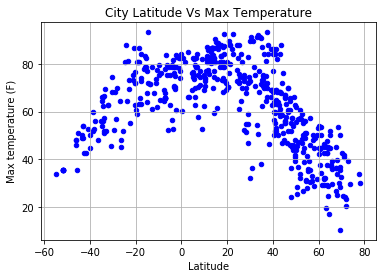

In [9]:
weather_dataframe.plot(kind='scatter', x='Lat', y='Max Temp', c='B')
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("LatitudeVsTemperature.png")
#In this plot the latitude increases the temperature increases.

#### Latitude vs. Humidity Plot

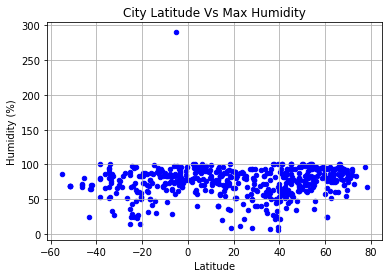

In [86]:
weather_dataframe.plot(kind='scatter',x='Lat',y='Humidity', c='B')
plt.title('City Latitude Vs Max Humidity' )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("LatitudeVsHumidity.png")
#In this plot there is higher humidity for most cities. 

#### Latitude vs. Cloudiness Plot

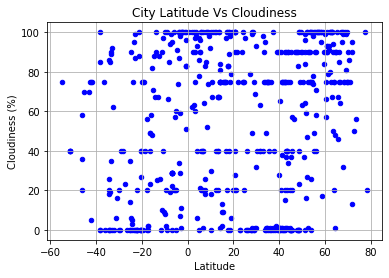

In [87]:
weather_dataframe.plot(kind='scatter',x='Lat',y='Cloudiness', c='B')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("LatitudeVsCloudiness.png")
#In this plot the cloudiness is average in all cities,latitude is not a strong predictor of cloudines

#### Latitude vs. Wind Speed Plot

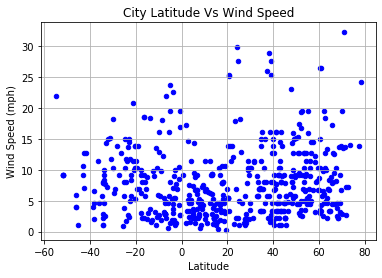

In [90]:
weather_dataframe.plot(kind='scatter',x='Lat',y='Wind Speed', c='B')
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("LatitudeVsWindSpeed.png")
#In this plot the average wind speed for all cities is low.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.4318603743163285


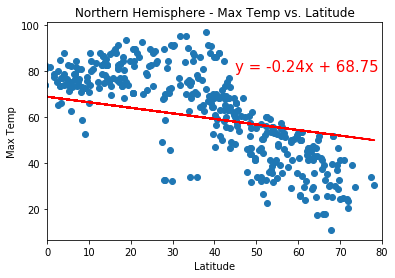

<Figure size 432x288 with 0 Axes>

In [91]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,80),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.xlim(0,80)
plt.show()
plt.savefig("NorthernHemisphere-MaxTempvs.Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.4318603743163285


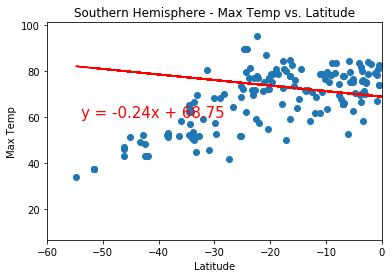

<Figure size 432x288 with 0 Axes>

In [92]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.xlim(-60,0)
plt.show()
plt.savefig("SouthernHemisphere-MaxTempvs.Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08876741785200566


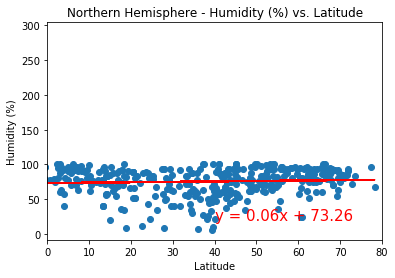

<Figure size 432x288 with 0 Axes>

In [93]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.xlim(0,80)
plt.show()
plt.savefig("NorthernHemisphere-Humidity(%)vs.Latitudee.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08876741785200566


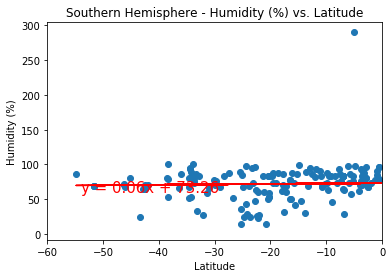

<Figure size 432x288 with 0 Axes>

In [94]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.xlim(-60,0)
plt.show()
plt.savefig("SouthernHemisphere-Humidity(%)vs.Latitudee.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21044809691668626


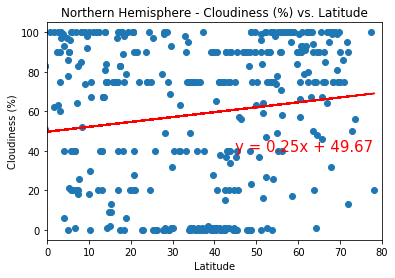

<Figure size 432x288 with 0 Axes>

In [95]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.xlim(0,80)
plt.show()
plt.savefig("NorthernHemisphere-Cloudiness(%)vs.Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21044809691668626


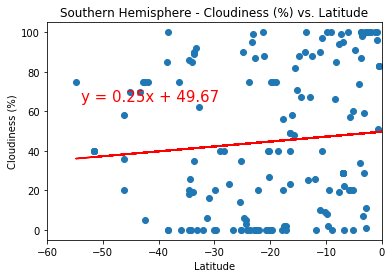

<Figure size 432x288 with 0 Axes>

In [96]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,65),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.xlim(-60,0)
plt.show()
plt.savefig("SouthernHemisphere-Cloudiness(%)vs.Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0843390164610811


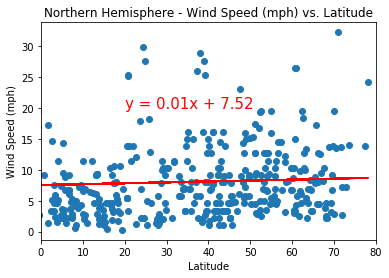

<Figure size 432x288 with 0 Axes>

In [97]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.xlim(0,80)
plt.show()
plt.savefig("NorthernHemisphere-WindSpeed(mph)vs.Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0843390164610811


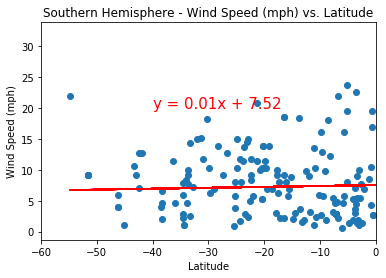

<Figure size 432x288 with 0 Axes>

In [98]:
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.xlim(-60,0)
plt.show()
plt.savefig("SouthernHemisphere-WindSpeed(mph)vs.Latitude.png")